In [1]:
#Digvijay Singh
#Assignment_2(OCR_LETTERS)
#3415

In [2]:
!pip install yellowbrick

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import model_selection
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

from sklearn import preprocessing
from yellowbrick.classifier import ConfusionMatrix

In [4]:
df = pd.read_csv("data/letter-recognition.csv", sep = ",")

In [5]:
df=df.iloc[:,1:]

In [6]:
df.head()

,T,2,8,3,5,1,8.1,13,0,6,6.1,10,8.2,0.1,8.3,0.2,8.4
0,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
1,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
2,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
3,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
4,S,4,11,5,8,3,8,8,6,9,5,6,6,0,8,9,7


In [7]:
names = ['Class',
         'x-box',
         'y-box',
         'width',
         'high',
         'onpix',
         'x-bar',
         'y-bar',
         'x2bar',
         'y2bar',
         'xybar',
         'x2ybr',
         'xy2br',
         'x-ege',
         'xegvy',
         'y-ege',
         'yegvx']

In [8]:
X = df.iloc[:, 1 : 17]
Y = df.select_dtypes(include = [object])


In [9]:
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size = 0.20, random_state = 10)

In [10]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [11]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [12]:
mlp = MLPClassifier(hidden_layer_sizes = (250, 300), max_iter = 1000000, activation = 'logistic')

In [13]:
cm = ConfusionMatrix(mlp, classes="A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P,Q,R,S,T,U,V,W,X,Y,Z".split(','))

ConfusionMatrix(ax=<AxesSubplot:>,
                classes=['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K',
                         'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V',
                         'W', 'X', 'Y', 'Z'],
                cmap=<matplotlib.colors.ListedColormap object at 0x7f51a361abb0>,
                estimator=MLPClassifier(activation='logistic',
                                        hidden_layer_sizes=(250, 300),
                                        max_iter=1000000))

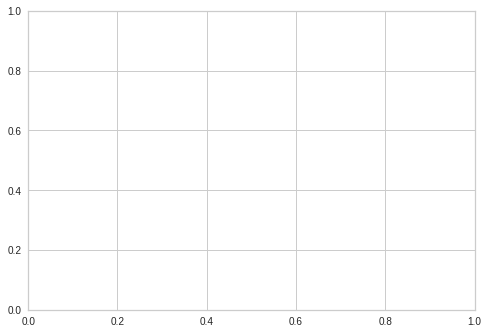

In [14]:
cm.fit(X_train, Y_train.values.ravel())

In [15]:
cm.score(X_test, Y_test)

/home/slp/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9025

In [16]:
predictions = cm.predict(X_test)

In [18]:
print("Accuracy: ", accuracy_score(Y_test, predictions))

Accuracy:  0.9025


In [19]:
print(confusion_matrix(Y_test, predictions))

[[12  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0
   0  0]
 [ 0 16  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0]
 [ 0  0 16  0  0  0  1  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0]
 [ 0  1  0 25  0  0  0  0  0  0  0  0  0  1  0  0  1  0  0  0  0  0  0  0
   0  1]
 [ 0  0  0  0 13  0  1  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  1
   0  2]
 [ 0  0  0  0  0 15  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0
   0  0]
 [ 0  0  0  0  0  1 15  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0
   0  0]
 [ 0  0  0  0  0  0  0 14  0  0  1  0  0  0  0  0  0  1  0  0  1  0  0  0
   0  0]
 [ 0  0  0  0  0  0  0  0 12  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0
   1  0]
 [ 0  0  0  0  0  0  0  0  0 14  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0]
 [ 0  0  0  0  0  0  0  0  0  0  8  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 18  0  0  0  0  0  0  0  0  0  0  0  0
   0  0]
 [ 0

In [20]:
print(classification_report(Y_test, predictions, digits=5))

              precision    recall  f1-score   support

           A    0.92308   0.92308   0.92308        13
           B    0.88889   0.94118   0.91429        17
           C    1.00000   0.88889   0.94118        18
           D    0.96154   0.86207   0.90909        29
           E    0.92857   0.72222   0.81250        18
           F    0.88235   0.93750   0.90909        16
           G    0.83333   0.88235   0.85714        17
           H    0.87500   0.82353   0.84848        17
           I    1.00000   0.85714   0.92308        14
           J    0.93333   1.00000   0.96552        14
           K    0.80000   1.00000   0.88889         8
           L    0.94737   1.00000   0.97297        18
           M    0.95238   1.00000   0.97561        20
           N    0.87500   0.87500   0.87500        16
           O    0.90000   0.85714   0.87805        21
           P    1.00000   1.00000   1.00000        12
           Q    0.87500   0.82353   0.84848        17
           R    0.77778   1

In [21]:
cm.poof()

<Figure size 576x396 with 0 Axes>

<AxesSubplot:title={'center':'MLPClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>